# Some computations with path semigroups using GAP

In [1]:
from mygap import mygap

In [2]:
M = mygap.FreeMonoid(['e1','e2','a','z'])

In [3]:
M.category()

Category of infinite g a p monoids

In [4]:
M.cardinality()

+Infinity

In [5]:
M.monoid_generators()

Family (e1, e2, a, z)

In [6]:
e1, e2, a, z = M.monoid_generators()

In [7]:
H = M / ([[e1*e1,e1], [e2*e2,e2], [e1*a,a], [a*e2,a], [e1*e2,z], [e2*e1,z], [e2*a,z], [a*e1,z]] +
         [[z*x,z] for x in M.monoid_generators()] +
         [[x*z,z] for x in M.monoid_generators()])

In [16]:
H.category()

Category of finite g a p monoids

In [8]:
H.monoid_generators()

Family (e1, e2, a, z)

In [9]:
e1,e2,a,z = H.monoid_generators()

In [10]:
e1^2

e1^2

In [11]:
e1 * a

e1*a

In [12]:
H.is_finite()

True

In [13]:
H.category()

Category of g a p monoids

In [17]:
H._refine_category_()

In [18]:
H.category()

Category of finite g a p monoids

In [19]:
H.list()

[<identity ...>, e1, e2, a, z]

In [20]:
phi = H.isomorphism_transformation_monoid()

In [21]:
HH = phi.codomain()

In [22]:
HH

<transformation monoid of degree 5 with 4 generators>

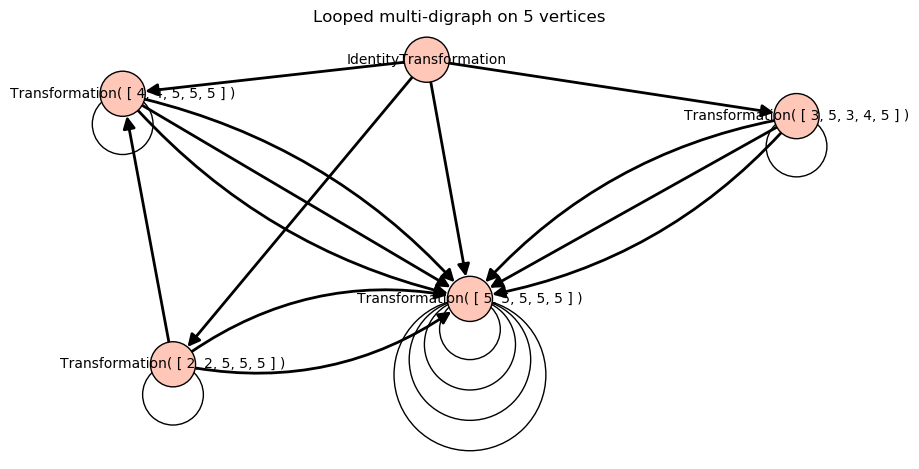

In [23]:
C = HH.cayley_graph(); C

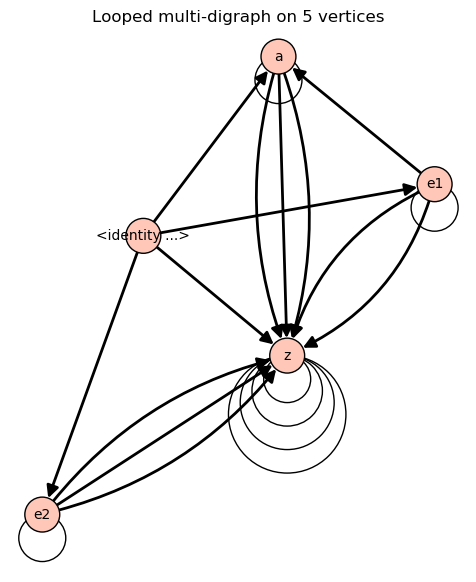

In [24]:
C.relabel(phi.preimage); C

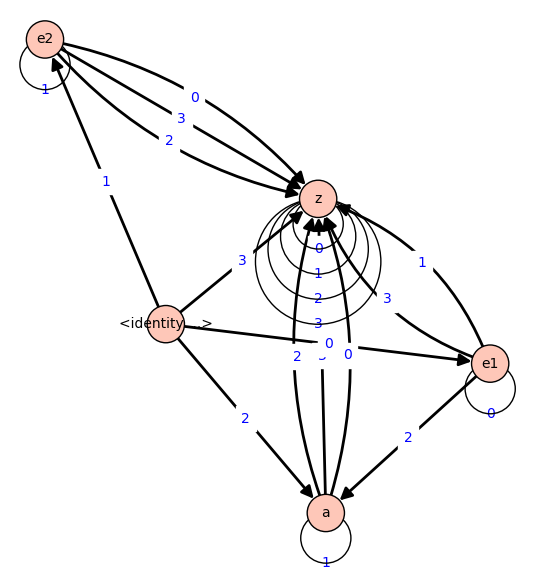

In [25]:
C.plot(edge_labels=True)

In [26]:
HHe1, HHe2, HHa, HHz = HH.monoid_generators()

In [42]:
x =phi.preimage(HHe1)

In [27]:
HHe1*HHe1 == HHe1

True

In [28]:
HHa*HHa

Transformation( [ 5, 5, 5, 5, 5 ] )

In [29]:
phi.preimage(phi(a) * phi(e2))

a

In [30]:
e1, e2, a, z = HH.monoid_generators()

In [31]:
e1*e1 == e1

True

In [32]:
a*a

Transformation( [ 5, 5, 5, 5, 5 ] )

In [52]:
phi.preimage(a*a)

<repr(<mygap.GAPParent_with_category.element_class at 0x7f9a372e2aa0>) failed: RuntimeError: maximum recursion depth exceeded while calling a Python object>

In [50]:
from mygap import GAPParent
GAPParent.Element._repr_

<unbound method GAPParent.Element._repr_>

In [68]:
HH.element_class._repr_ = lambda self: "0" if self == z else repr(phi.preimage(self)) if self.parent() is HH else super(HH.element_class, self)._repr_()

In [69]:
a

a

In [70]:
z

0

## Computing with the monoid algebra

In [34]:
A = HH.algebra(QQ)

In [35]:
A.category()

Join of Category of finite dimensional algebras with basis over Rational Field and Category of monoid algebras over Rational Field and Category of finite set algebras over Rational Field

In [36]:
A.cartan_invariants_matrix()

[1 0 0 0]
[0 1 1 0]
[0 0 1 0]
[0 0 0 1]

In [37]:
A.center_basis()

(B[IdentityTransformation],
 B[Transformation( [ 2, 2, 5, 5, 5 ] )] + B[Transformation( [ 3, 5, 3, 4, 5 ] )],
 B[Transformation( [ 5, 5, 5, 5, 5 ] )])

In [38]:
A.radical_basis()

(B[Transformation( [ 4, 4, 5, 5, 5 ] )] - B[Transformation( [ 5, 5, 5, 5, 5 ] )],)

In [39]:
A._repr_term = lambda x: repr(phi.preimage(x))

In [40]:
A.an_element()

3*e2 + <identity ...> + 3*e1

In [41]:
A.radical_basis()

(a - z,)